Import packages

In [143]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

Import Cancer Dataset

In [3]:
cancer_data = pd.read_csv('cancer incidence by region.csv')

In [4]:
cancer_data.head()

,Region,Regional Health Area,Year,Case numbers,% Invasive ex. NMSC,Crude rate
0,Co Clare,Other RHA,1994,304,100.00%,327.69
1,Co Clare,Other RHA,1995,245,100.00%,262.67
2,Co Clare,Other RHA,1996,280,100.00%,297.85
3,Co Clare,Other RHA,1997,320,100.00%,339.45
4,Co Clare,Other RHA,1998,286,100.00%,299.59


Clean Cancer dataset

In [5]:
cancer_data.drop("% Invasive ex. NMSC", axis=1)

,Region,Regional Health Area,Year,Case numbers,Crude rate
0,Co Clare,Other RHA,1994,304,327.69
1,Co Clare,Other RHA,1995,245,262.67
2,Co Clare,Other RHA,1996,280,297.85
3,Co Clare,Other RHA,1997,320,339.45
4,Co Clare,Other RHA,1998,286,299.59
...,...,...,...,...,...
905,Co Wexford,Other RHA,2015,725,489.22
906,Co Wexford,Other RHA,2016,689,461.74
907,Co Wexford,Other RHA,2017,773,521.19
908,Co Wexford,Other RHA,2018,764,515.11


In [6]:
cancer_data = cancer_data[["Regional Health Area", "Region", "Year", "Case numbers", "Crude rate"]]

In [7]:
cancer_data.head()

,Regional Health Area,Region,Year,Case numbers,Crude rate
0,Other RHA,Co Clare,1994,304,327.69
1,Other RHA,Co Clare,1995,245,262.67
2,Other RHA,Co Clare,1996,280,297.85
3,Other RHA,Co Clare,1997,320,339.45
4,Other RHA,Co Clare,1998,286,299.59


In [8]:
cancer_data.sort_values(["Year", "Region"])


,Regional Health Area,Region,Year,Case numbers,Crude rate
78,Other RHA,Co Carlow,1994,132,319.24
52,RHA A,Co Cavan,1994,230,434.86
0,Other RHA,Co Clare,1994,304,327.69
26,Other RHA,Co Cork,1994,1497,359.43
104,Other RHA,Co Donegal,1994,493,381.47
...,...,...,...,...,...
259,Other RHA,HSE Dublin Mid Leinster,2019,7432,536.07
311,Other RHA,HSE South,2019,6619,564.45
337,Other RHA,HSE West,2019,5972,577.65
675,Total Ireland,Ireland,2019,24871,505.35


Filtering Cancer dataset to RHA A only

In [117]:
cancer_data = cancer_data.rename(columns = {'Region' : 'COUNTY', 'Crude rate' : 'Cancer incidence rate'})
cancer_data['COUNTY'] = cancer_data['COUNTY'].str.replace('Co ','')
cancer_data.head()

,Regional Health Area,COUNTY,Year,Case numbers,Cancer incidence rate
0,Other RHA,Clare,1994,304,327.69
1,Other RHA,Clare,1995,245,262.67
2,Other RHA,Clare,1996,280,297.85
3,Other RHA,Clare,1997,320,339.45
4,Other RHA,Clare,1998,286,299.59


In [144]:
RHA_cancer_data = cancer_data["Regional Health Area"].isin(["RHA A"])
RHA_A = cancer_data[RHA_cancer_data]
RHA_A.head(20)

,Regional Health Area,COUNTY,Year,Case numbers,Cancer incidence rate
52,RHA A,Cavan,1994,230,434.86
53,RHA A,Cavan,1995,198,374.62
54,RHA A,Cavan,1996,211,398.53
55,RHA A,Cavan,1997,232,437.26
56,RHA A,Cavan,1998,222,415.84
57,RHA A,Cavan,1999,194,359.93
58,RHA A,Cavan,2000,205,375.40
59,RHA A,Cavan,2001,245,443.97
60,RHA A,Cavan,2002,252,445.65
61,RHA A,Cavan,2003,237,412.57


Filtering RHA A Cancer dataset to relevent years

In [145]:
RHA_A = RHA_A[RHA_A["Year"] >2005]
RHA_A.head()

,Regional Health Area,COUNTY,Year,Case numbers,Cancer incidence rate
64,RHA A,Cavan,2006,272,424.98
65,RHA A,Cavan,2007,269,406.94
66,RHA A,Cavan,2008,264,389.27
67,RHA A,Cavan,2009,290,417.84
68,RHA A,Cavan,2010,321,459.35


Cleaning naming conventions in dataset

Creating an RHA total datasets

In [122]:
RHA_total = cancer_data["Regional Health Area"].isin(["Other RHA"])
RHA_total = cancer_data[RHA_total]
RHA_total.head()

,Regional Health Area,COUNTY,Year,Case numbers,Cancer incidence rate
0,Other RHA,Clare,1994,304,327.69
1,Other RHA,Clare,1995,245,262.67
2,Other RHA,Clare,1996,280,297.85
3,Other RHA,Clare,1997,320,339.45
4,Other RHA,Clare,1998,286,299.59


In [147]:
RHA_total = RHA_total[RHA_total["Year"] >2005]
RHA_total.head()

,Regional Health Area,COUNTY,Year,Case numbers,Cancer incidence rate
12,Other RHA,Clare,2006,433,390.27
13,Other RHA,Clare,2007,409,362.79
14,Other RHA,Clare,2008,520,450.08
15,Other RHA,Clare,2009,459,395.40
16,Other RHA,Clare,2010,526,450.39


In [156]:
RHA_total = RHA_total.groupby(['Regional Health Area'])

KeyError: 'Regional Health Area'

In [146]:
RHA_A_total = RHA_A["COUNTY"].isin(["RHA A Total"])
RHA_A_total = RHA_A[RHA_A_total]
RHA_A_total.head()

,Regional Health Area,COUNTY,Year,Case numbers,Cancer incidence rate
272,RHA A,RHA A Total,2006,3406,366.78
273,RHA A,RHA A Total,2007,3575,371.03
274,RHA A,RHA A Total,2008,3642,369.55
275,RHA A,RHA A Total,2009,3789,377.47
276,RHA A,RHA A Total,2010,4064,402.88


Creating an Ireland total dataset

In [124]:
Ireland_cancer_data = cancer_data["Regional Health Area"].isin(["Total Ireland"])
total_ireland = cancer_data[Ireland_cancer_data]
total_ireland = total_ireland[total_ireland["Year"] >2005]
total_ireland.head()

,Regional Health Area,COUNTY,Year,Case numbers,Cancer incidence rate
662,Total Ireland,Ireland,2006,16692,394.34
663,Total Ireland,Ireland,2007,17800,406.78
664,Total Ireland,Ireland,2008,18582,414.31
665,Total Ireland,Ireland,2009,19342,426.66
666,Total Ireland,Ireland,2010,19922,437.39


Import deprivation dataset

In [125]:
deprivation_data = pd.read_csv('deprivation levels.csv', encoding='unicode_escape')
deprivation_data.head()

,ED_ID,GEOGDESC,COUNTY,Regional Health Area,Year,Population,Score
0,E01001,Carlow Urban,Carlow,Other RHA,2006,4605,3.42612
1,E01002,Graigue Urban,Carlow,Other RHA,2006,1524,3.18253
2,E01003,Clonmore,Carlow,Other RHA,2006,530,-0.43519
3,E01004,Hacketstown,Carlow,Other RHA,2006,1065,2.08920
4,E01005,Haroldstown,Carlow,Other RHA,2006,267,-1.26686


In [126]:
deprivation_data['COUNTY'] = deprivation_data['COUNTY'].str.replace('Dublin City','Dublin North')
deprivation_data['COUNTY'] = deprivation_data['COUNTY'].str.replace('Fingal','Dublin North')

Get weighted average of deprivation score

In [127]:
def weighted_average(deprivation_data, values, weights):
    return sum(deprivation_data[weights] * deprivation_data[values]) / deprivation_data[weights].sum()

Pulling out 3 datasets, 1. All counties RHA A, 2. Total RHA A, 3. Total Ireland 

In [128]:
dp_data = deprivation_data.groupby(['Regional Health Area','COUNTY', 'Year']).apply(weighted_average, 'Score', 'Population').to_frame(name = 'weighted_mean_dp').reset_index()
dp_data.head()

,Regional Health Area,COUNTY,Year,weighted_mean_dp
0,Other RHA,Carlow,2006,0.777419
1,Other RHA,Carlow,2011,0.962001
2,Other RHA,Carlow,2016,1.157709
3,Other RHA,Clare,2006,-0.068201
4,Other RHA,Clare,2011,-0.025837


In [129]:
RHA_dp_data = dp_data["Regional Health Area"].isin(["RHA A"])
RHA_A_dp = dp_data[RHA_dp_data]
RHA_A_dp.head(20)

,Regional Health Area,COUNTY,Year,weighted_mean_dp
87,RHA A,Cavan,2006,0.317616
88,RHA A,Cavan,2011,0.555036
89,RHA A,Cavan,2016,0.730796
90,RHA A,Dublin North,2006,1.215303
91,RHA A,Dublin North,2011,0.785628
92,RHA A,Dublin North,2016,0.789923
93,RHA A,Louth,2006,1.151057
94,RHA A,Louth,2011,1.151722
95,RHA A,Louth,2016,1.179671
96,RHA A,Meath,2006,-0.466371


In [130]:
dp_ireland = deprivation_data.groupby(['Year']).apply(weighted_average, 'Score', 'Population')
dp_ireland.head()

Year
2006    0.525671
2011    0.442238
2016    0.490269
dtype: float64

In [131]:
dp_RHA = deprivation_data.groupby(['Regional Health Area', 'Year']).apply(weighted_average, 'Score', 'Population').to_frame(name = 'weighted_mean_dp').reset_index()
dp_RHA.head()

,Regional Health Area,Year,weighted_mean_dp
0,Other RHA,2006,0.451345
1,Other RHA,2011,0.392826
2,Other RHA,2016,0.452691
3,RHA A,2006,0.790698
4,RHA A,2011,0.614618


In [132]:
RHA_dp_cancer = cancer_RHA_A.merge(RHA_A_dp, left_on=['Regional Health Area', 'COUNTY', 'Year'], right_on=['Regional Health Area','COUNTY', 'Year'], how = 'left')
RHA_dp_cancer.head(20)


,Regional Health Area,COUNTY,Year,Case numbers,Crude rate,weighted_mean_dp
0,RHA A,Cavan,2006,272,424.98,0.317616
1,RHA A,Cavan,2007,269,406.94,NaN
2,RHA A,Cavan,2008,264,389.27,NaN
3,RHA A,Cavan,2009,290,417.84,NaN
4,RHA A,Cavan,2010,321,459.35,NaN
5,RHA A,Cavan,2011,300,410.18,0.555036
6,RHA A,Cavan,2012,330,454.13,NaN
7,RHA A,Cavan,2013,345,475.65,NaN
8,RHA A,Cavan,2014,335,467.35,NaN
9,RHA A,Cavan,2015,352,499.21,NaN


Fill forward the data for years available in the Deprivation Dataset to the last available years data

In [133]:
RHA_dp_cancer = RHA_dp_cancer.fillna(method='ffill')

Import in age standardised cancer death rates

In [134]:
cancer_deaths = pd.read_csv('Age standardised death rate from Malignant neoplasms.csv')
cancer_deaths.head()

,Statistic Label,Year,Age Group,Sex,Cause of Death,Area,UNIT,Age Standardised Death rate
0,Standardised Death Rate,2006,All ages,Both sexes,Malignant neoplasms,All counties and regions,Rate,315.66
1,Standardised Death Rate,2006,All ages,Both sexes,Malignant neoplasms,Carlow,Rate,363.09
2,Standardised Death Rate,2006,All ages,Both sexes,Malignant neoplasms,Dublin City and County,Rate,329.63
3,Standardised Death Rate,2006,All ages,Both sexes,Malignant neoplasms,Kildare,Rate,312.60
4,Standardised Death Rate,2006,All ages,Both sexes,Malignant neoplasms,Kilkenny,Rate,279.41


Clean Data set to match merged data (Note Dublin only available for all county)

In [135]:
cancer_deaths = cancer_deaths.drop(["Statistic Label", "Age Group", "Sex", "Cause of Death", "UNIT"], axis=1)

In [136]:
cancer_deaths = cancer_deaths.rename(columns = {'Area' : 'COUNTY'})
cancer_deaths['COUNTY'] = cancer_deaths['COUNTY'].str.replace('Dublin City and County','Dublin North')
cancer_deaths['COUNTY'] = cancer_deaths['COUNTY'].str.replace('All counties and regions', 'Total Ireland')
cancer_deaths.head()

,Year,COUNTY,Age Standardised Death rate
0,2006,Total Ireland,315.66
1,2006,Carlow,363.09
2,2006,Dublin North,329.63
3,2006,Kildare,312.60
4,2006,Kilkenny,279.41


In [137]:
RHA_dp_deaths_cancer = RHA_dp_cancer.merge(cancer_deaths, left_on=['COUNTY', 'Year'], right_on=['COUNTY', 'Year'], how = 'inner')
RHA_dp_deaths_cancer.head(20)

,Regional Health Area,COUNTY,Year,Case numbers,Crude rate,weighted_mean_dp,Age Standardised Death rate
0,RHA A,Cavan,2006,272,424.98,0.317616,281.22
1,RHA A,Cavan,2007,269,406.94,0.317616,309.12
2,RHA A,Cavan,2008,264,389.27,0.317616,297.60
3,RHA A,Cavan,2009,290,417.84,0.317616,249.35
4,RHA A,Cavan,2010,321,459.35,0.317616,320.76
5,RHA A,Cavan,2011,300,410.18,0.555036,287.10
6,RHA A,Cavan,2012,330,454.13,0.555036,255.67
7,RHA A,Cavan,2013,345,475.65,0.555036,264.74
8,RHA A,Cavan,2014,335,467.35,0.555036,270.33
9,RHA A,Cavan,2015,352,499.21,0.555036,267.53


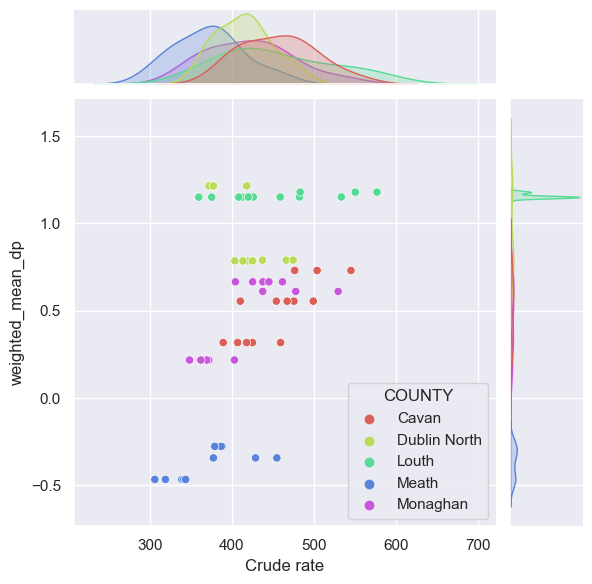

In [138]:
sns.jointplot(data=RHA_dp_deaths_cancer, x='Crude rate', y='weighted_mean_dp', hue = 'COUNTY', palette='hls')
plt.show()

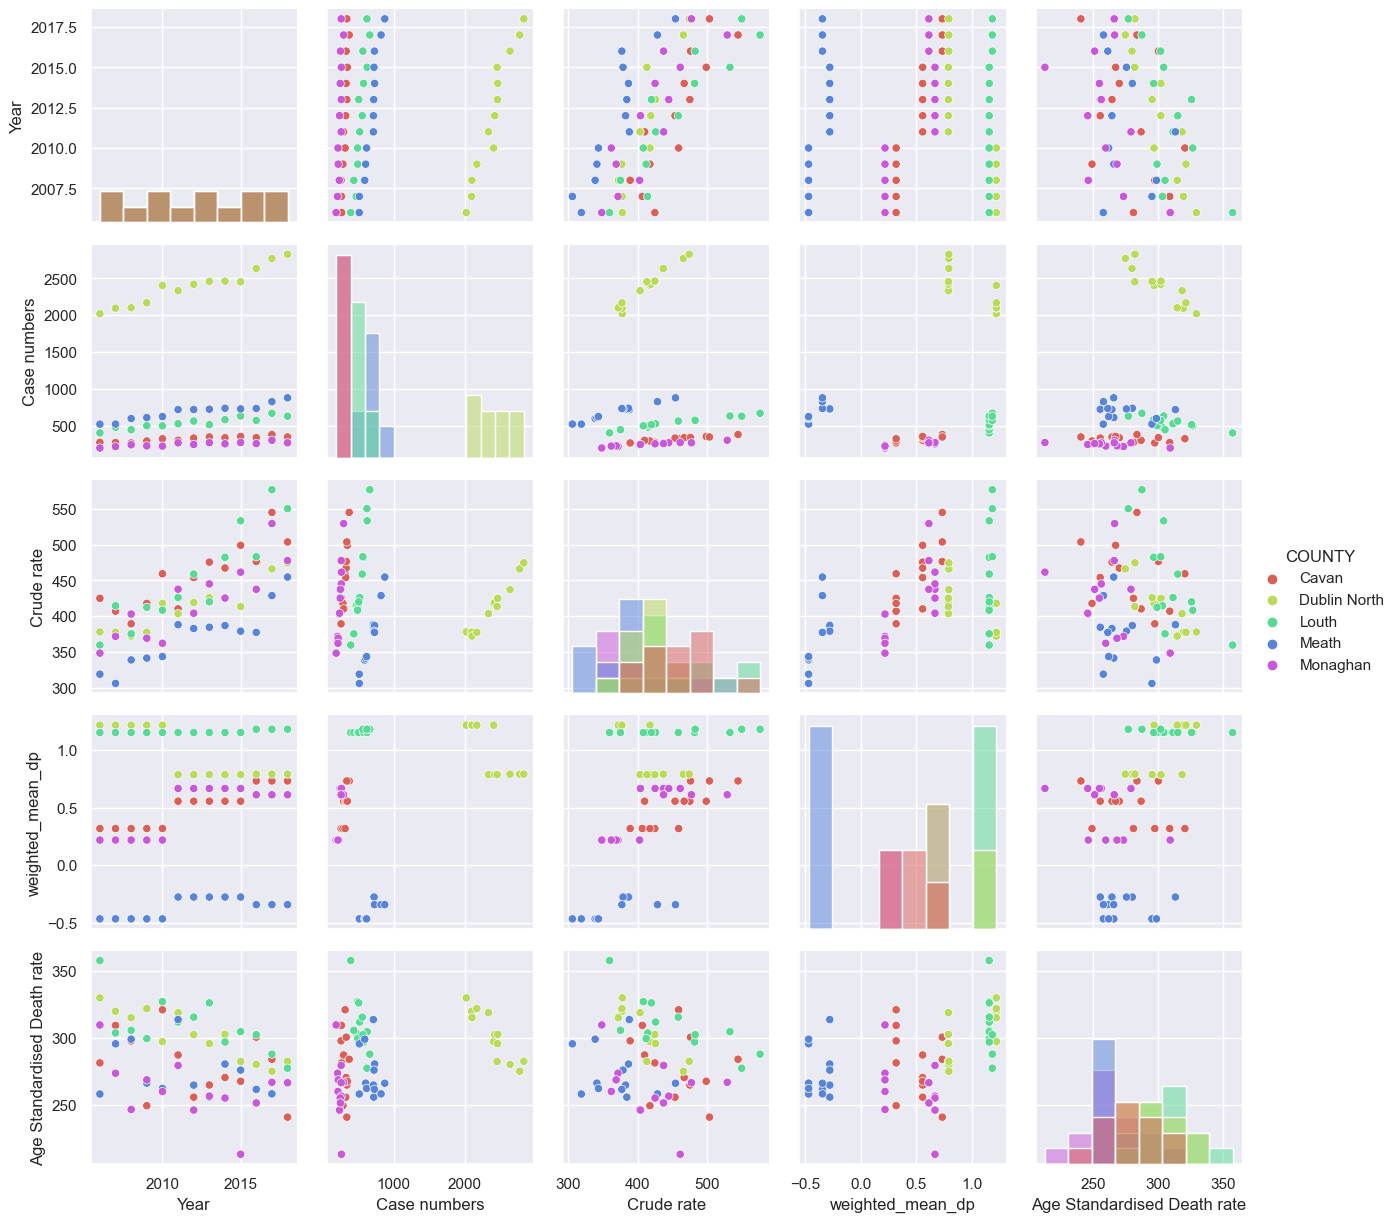

In [139]:
g = sns.PairGrid(RHA_dp_deaths_cancer, hue="COUNTY", palette='hls')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

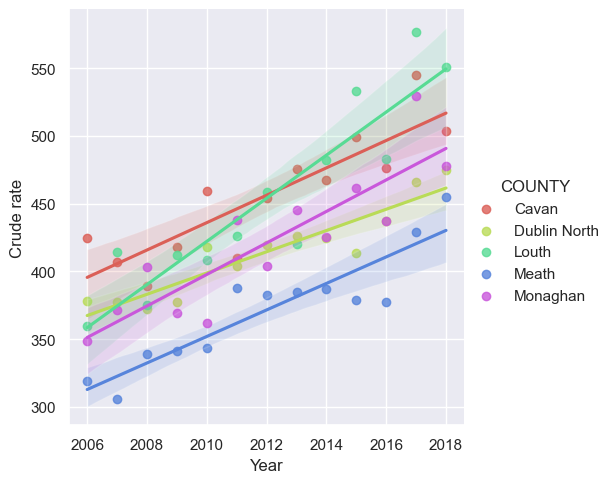

In [140]:
sns.lmplot(data=RHA_dp_deaths_cancer, x='Year', y='Crude rate', hue = 'COUNTY', palette='hls')

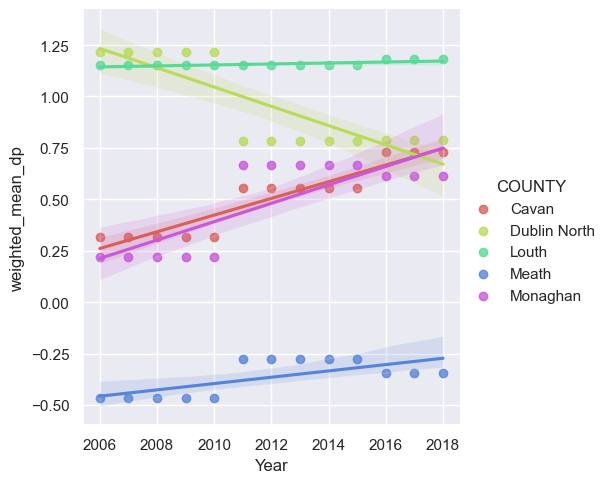

In [141]:
sns.lmplot(data=RHA_dp_deaths_cancer, x='Year', y='weighted_mean_dp', hue = 'COUNTY', palette='hls')

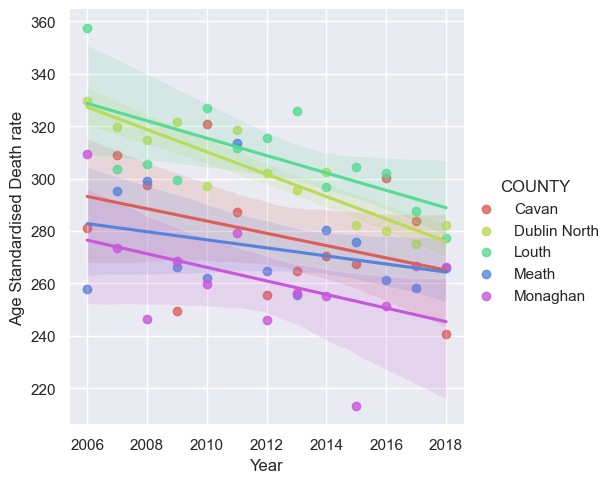

In [142]:
sns.lmplot(data=RHA_dp_deaths_cancer, x='Year', y='Age Standardised Death rate', hue = 'COUNTY', palette='hls')

In [ ]:
national_comparison = pd.concat([brics_df, gdp_df], axis=1)